# PCA Plots

## General settings and loading files

In [1]:
%%time

% matplotlib notebook
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM


[09:45:25] 'panels' dict
[09:45:25] 'galanter', 'present', 'missing' dataframes
[09:45:25] 'panel_labels'
[09:45:25] 'panel_names' dict
[09:45:25] 'panel_rsIDs' dict
[09:45:25] 'genome' dataframe
[09:45:30] 'lat' dataframe
[09:45:44] 'control_genotypes' huge datagrame
[09:45:44] 'control_rsIDs' dict to filter it ^
[09:45:44] 'cp_factors' list
[09:45:44] 'control_names' dict
[09:45:44] 'df_1000G_samples'
[09:45:44] 'df_1000G_SNPs'
[09:45:44] 'df_1000G_genotypes'
[09:45:44] 'df_1000G_populations'
[09:45:44] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/settings/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[09:45:44] 'mafs' dataframe
CPU times: user 16.5 s, sys: 3.22 s, total: 19.8 s
Wall time: 19.6 s


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

In [31]:
% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples

[10:43:42] 'dataset_names'
[10:43:42] 'dataset_populations'


NameError: name 'DATASETS_DIR' is not defined


  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_dumps/LEACI.samples
 3662 total


## PCA plots

In [13]:
dataset_samples

OrderedDict([('LEA',
              array(['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102',
                     'HG00103', 'HG00105', 'HG00106', 'HG00107', 'HG00108', 'HG00109',
                     'HG00110', 'HG00111', 'HG00112', 'HG00113', 'HG00114', 'HG00115',
                     'HG00116', 'HG00117', 'HG00118', 'HG00119', 'HG00120', 'HG00121',
                     'HG00122', 'HG00123', 'HG00125', 'HG00126', 'HG00127', 'HG00128',
                     'HG00129', 'HG00130', 'HG00131', 'HG00132', 'HG00133', 'HG00136',
                     'HG00137', 'HG00138', 'HG00139', 'HG00140', 'HG00141', 'HG00142',
                     'HG00143', 'HG00145', 'HG00146', 'HG00148', 'HG00149', 'HG00150',
                     'HG00151', 'HG00154', 'HG00155', 'HG00157', 'HG00158', 'HG00159',
                     'HG00160', 'HG00231', 'HG00232', 'HG00233', 'HG00234', 'HG00235',
                     'HG00236', 'HG00237', 'HG00238', 'HG00239', 'HG00240', 'HG00242',
                     '

<IPython.core.display.Javascript object>


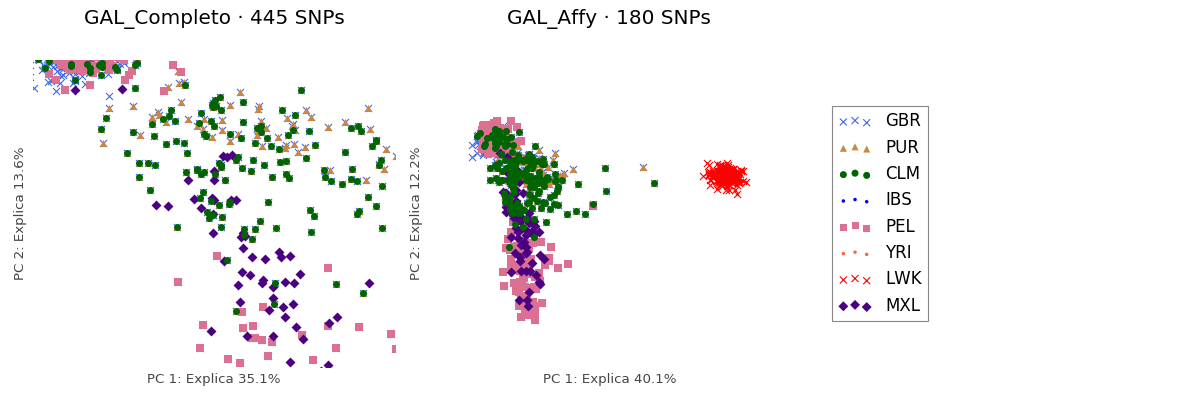

<IPython.core.display.Javascript object>


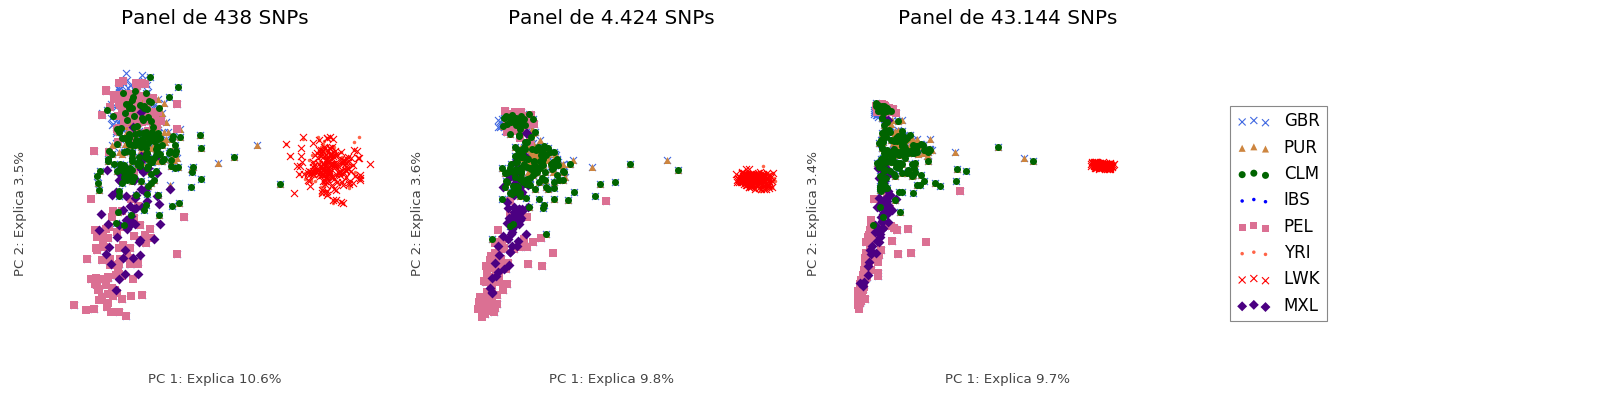

<IPython.core.display.Javascript object>


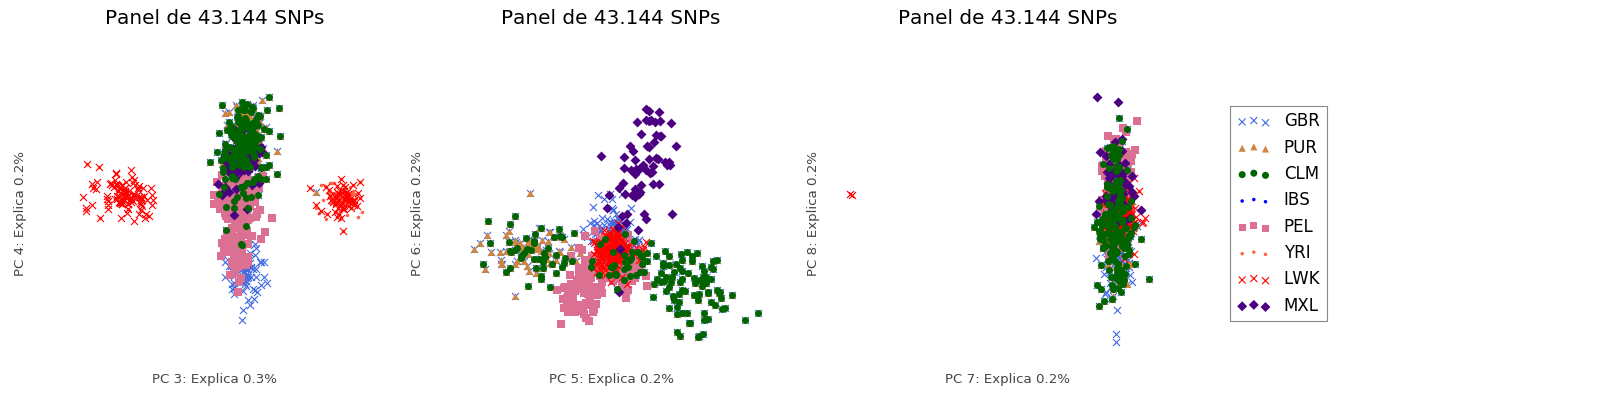

<IPython.core.display.Javascript object>


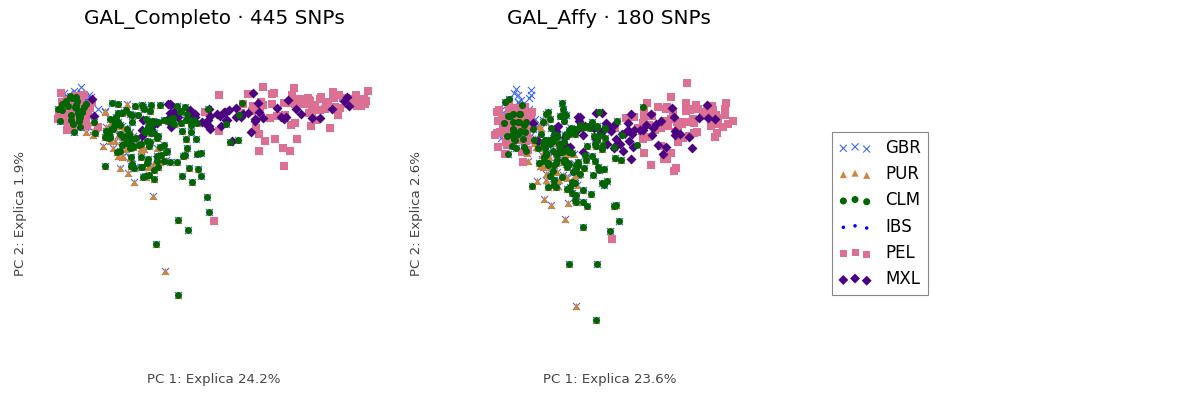

<IPython.core.display.Javascript object>


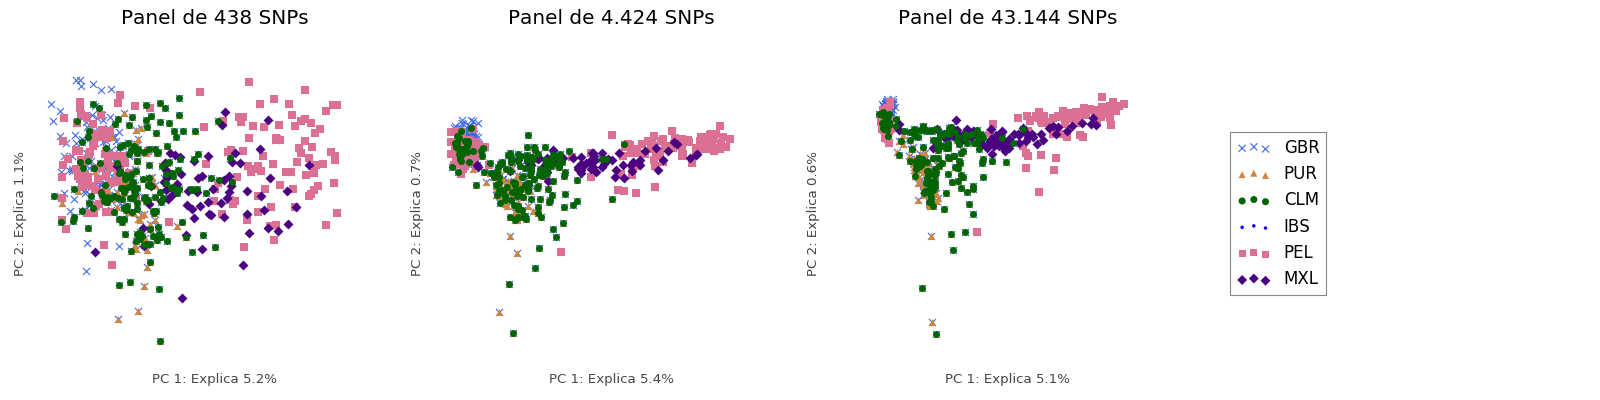

<IPython.core.display.Javascript object>


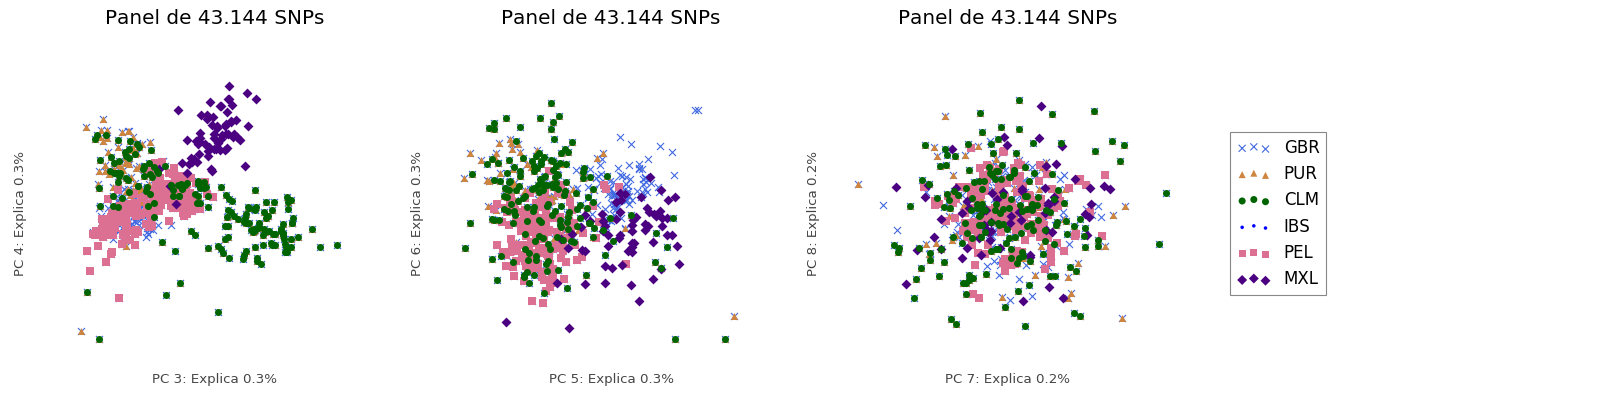

<IPython.core.display.Javascript object>


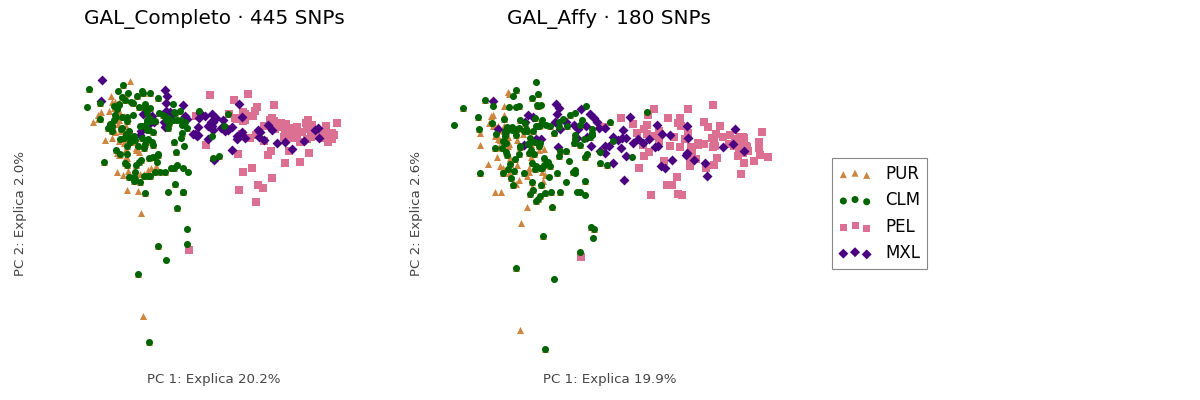

<IPython.core.display.Javascript object>


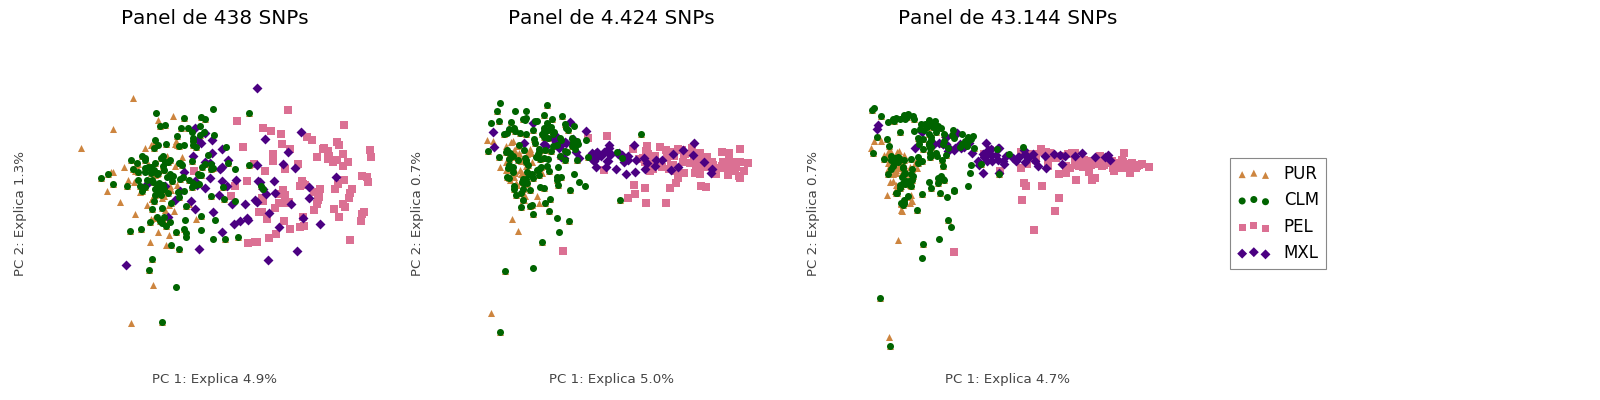

<IPython.core.display.Javascript object>


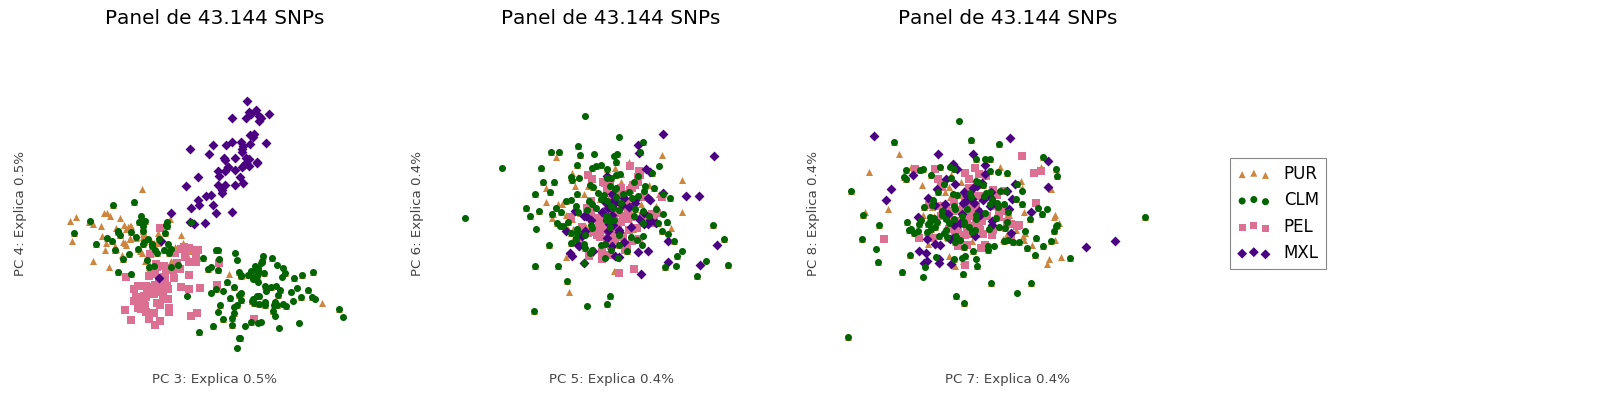

<IPython.core.display.Javascript object>


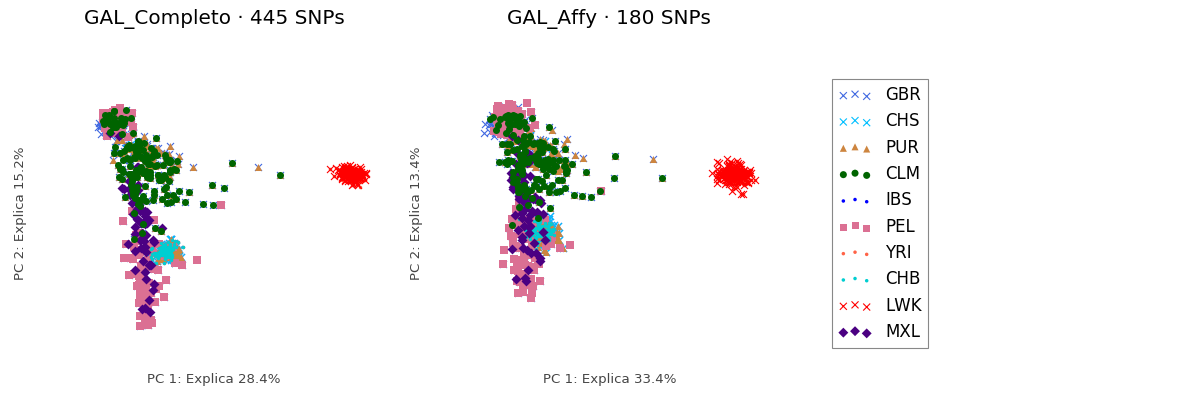

<IPython.core.display.Javascript object>


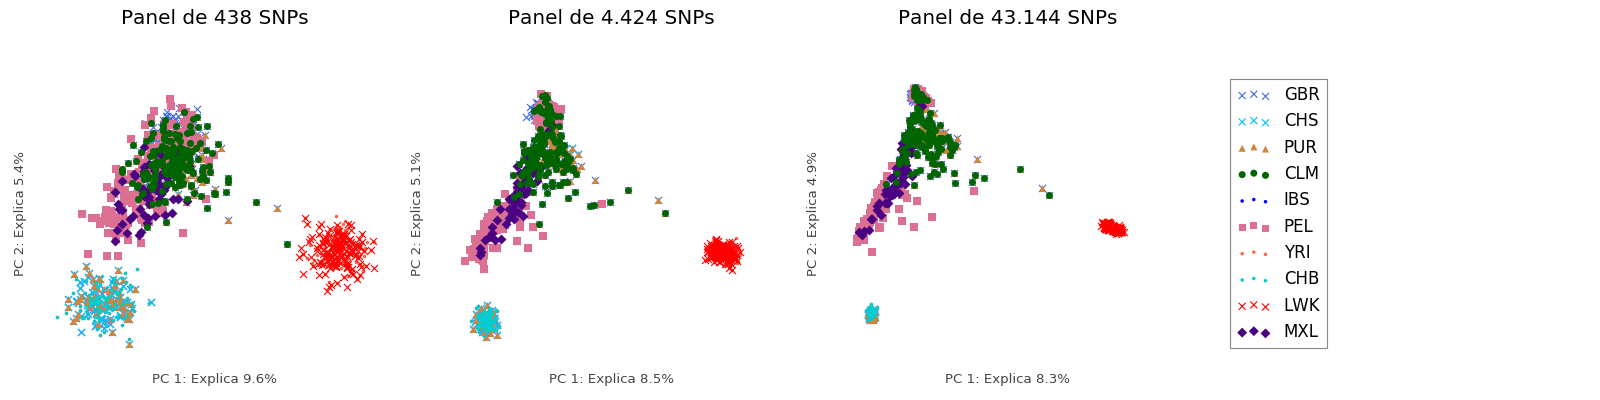

<IPython.core.display.Javascript object>


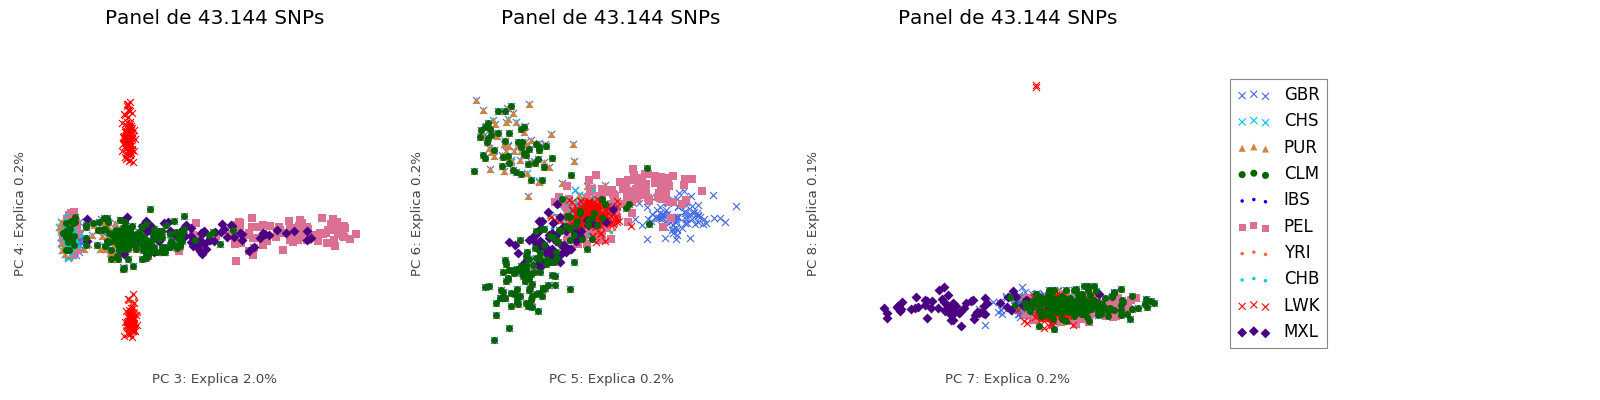

<IPython.core.display.Javascript object>


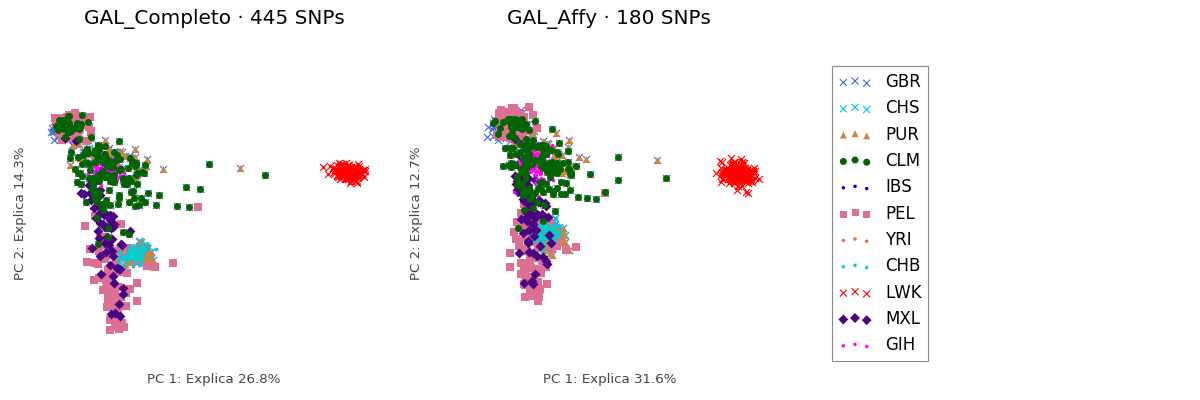

<IPython.core.display.Javascript object>


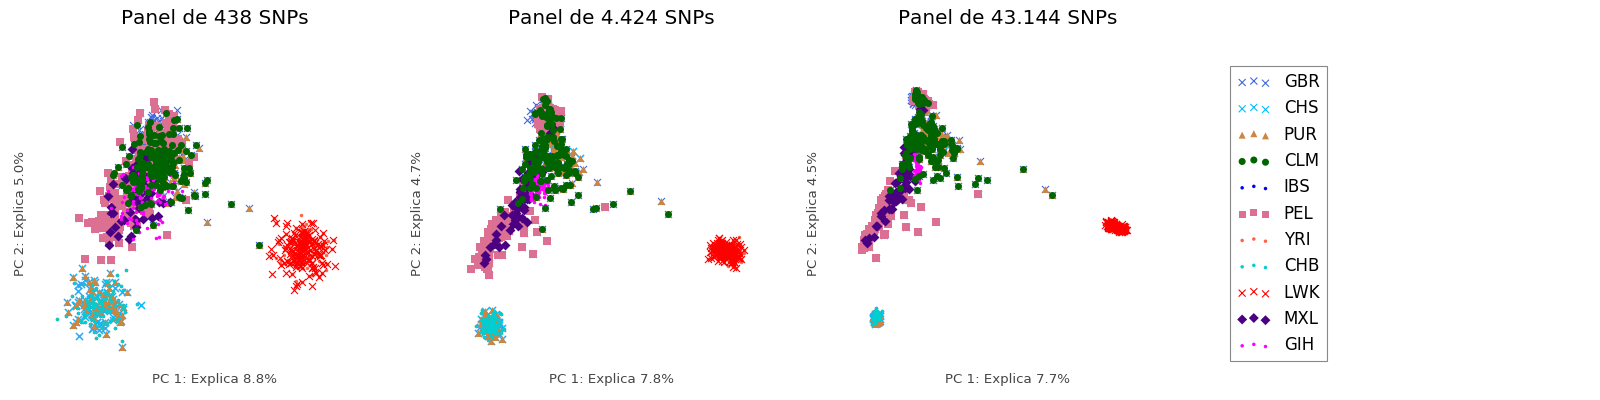

<IPython.core.display.Javascript object>


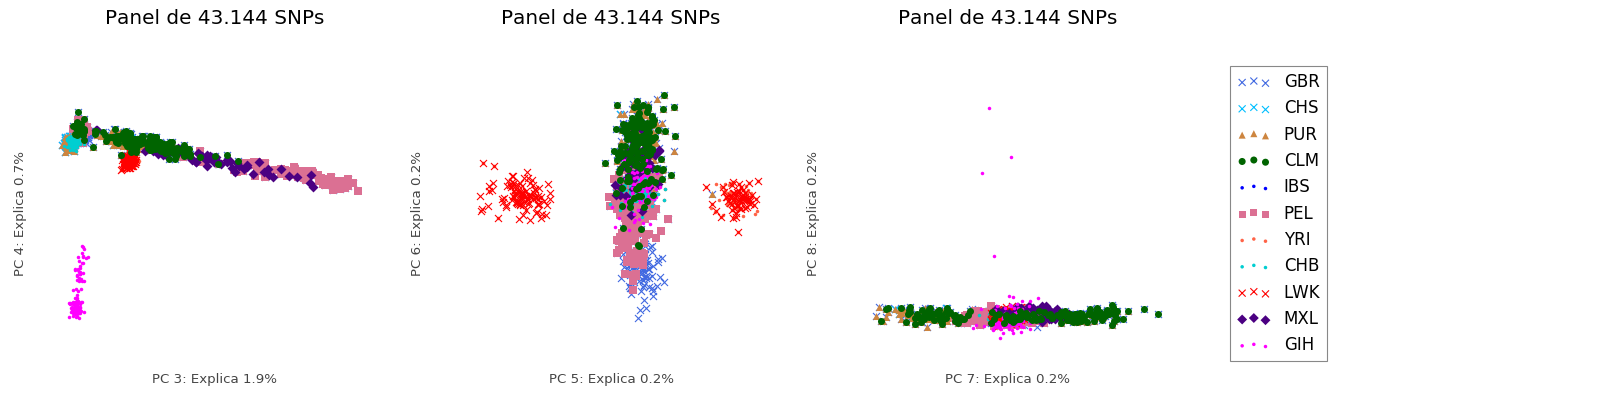

CPU times: user 11min 55s, sys: 2min 38s, total: 14min 34s
Wall time: 4min 1s


In [3]:
%%time

# == WARNING ==
# This cell will take ~4m to execute
# And it will take ~500 Mb RAM, I think

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [(0, 1)]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}_{}_{}".format(dataset_label, "_".join(panel_labels).lower(),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])
    
    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    pca_plotter.plot(fig_title, panel_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, panel_names, filename)
    
    # Control Panels
    dataset_genotypes = control_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, control_labels, components_to_compare)
    pca_plotter.plot(fig_title, control_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, control_names, filename)
    
    # Control Panels - Extra components
    only_big_cp = {"100": control_rsIDs["100"]}
    more_components_to_compare = [(2, 3), (4, 5), (6, 7)]
    dataset_genotypes = control_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, ["100"], more_components_to_compare)
    pca_plotter.plot(fig_title, only_big_cp, dataset_genotypes, df_1000G_samples,
                     more_components_to_compare, control_names, filename)